 Roll no : P24DS005

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
lenna_color = cv2.imread('lena_color.jpg')
lenna_gray = cv2.imread('lena_color.jpg',cv2.IMREAD_GRAYSCALE)
peppers = cv2.imread('peppers.jpg', cv2.COLOR_BGR2RGB)

# Function to display images side by side
def show_images(images, titles):
    plt.figure(figsize=(20,10))  # Adjust the figure size as needed
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


* 1.To see the effect of reducing the number of gray levels in an image.

* Start by reducing the gray levels to powers of two (e.g., 128, 64, 32, 16, 8, 4, 2 levels). For each level, display the result to observe the change in the distribution of gray levels

* For Reduce gray level We gonna use "lena_color.png" image.

* But we have porblem in use of gray image of lena that's why we gonna convert color image to gray image and use that image.


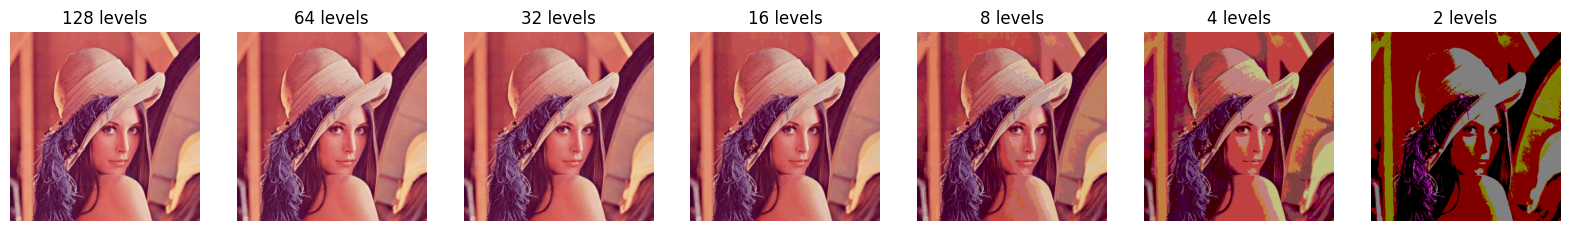

In [18]:
# Function to reduce gray levels for color images
def reduce_gray_levels_color(image, levels):
    step = 256 // levels
    reduced_image = np.zeros_like(image)
    for i in range(3):  # Apply to each channel
        reduced_image[:, :, i] = np.uint8((image[:, :, i] // step) * step)
    return reduced_image

# Example: Reducing gray levels to 128, 64, 32, etc.
reduced_images = [reduce_gray_levels_color(lenna_color, levels) for levels in [128, 64, 32, 16, 8, 4, 2]]
show_images(reduced_images, ['128 levels', '64 levels', '32 levels', '16 levels', '8 levels', '4 levels', '2 levels'])

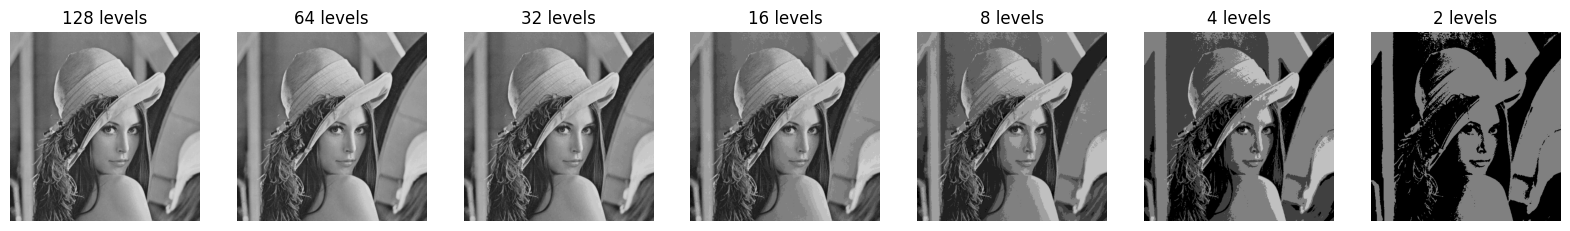

In [19]:
# Function to reduce gray levels
def reduce_gray_levels(image, levels):
    step = 256 // levels
    return np.uint8((image // step) * step)

# Example: Reducing gray levels to 128, 64, 32, etc.
reduced_images = [reduce_gray_levels(lenna_gray, levels) for levels in [128, 64, 32, 16, 8, 4, 2]]
show_images(reduced_images, ['128 levels', '64 levels', '32 levels', '16 levels', '8 levels', '4 levels', '2 levels'])


#Reduce gray level

reduce gray level means we have reduve intensity level of color.
like, when we choose 2 levels, it means there is only two intensity of colors in that photo. so, that photo look like only black and white.

we can use choose levels in power of 2 because we have to devide a 256.

All types of level shows on above section.

2. To see the effect of zooming using interpolation of the original image

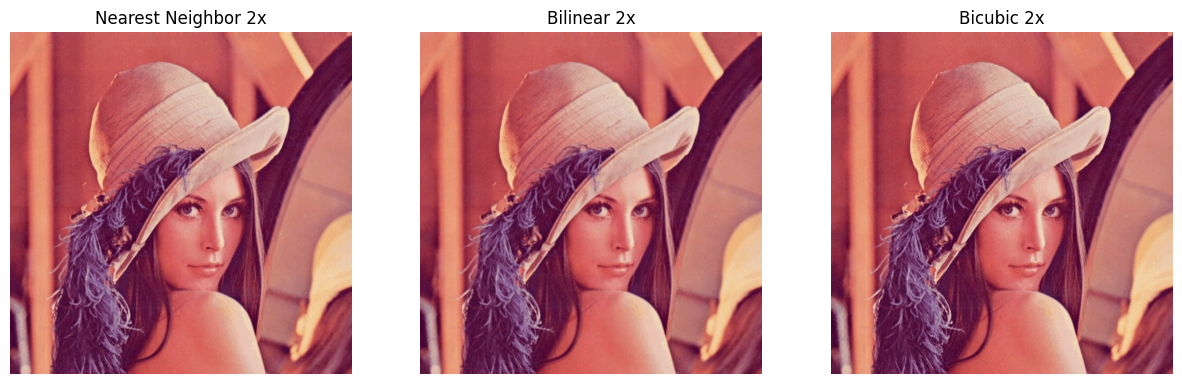

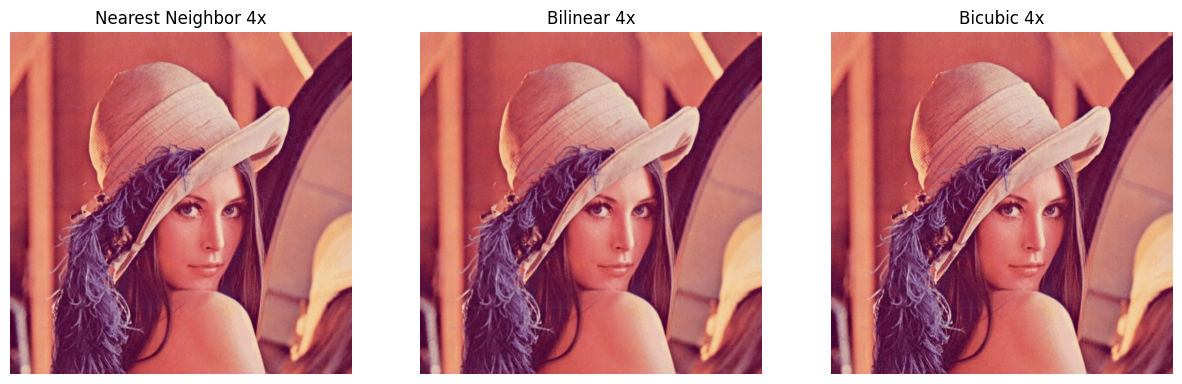

In [20]:
import cv2
import matplotlib.pyplot as plt

# Function to zoom using nearest-neighbor interpolation
def nearest_neighbor_zoom(image, zoom_factor):
    return cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_NEAREST)

# Function to zoom using bilinear interpolation
def bilinear_zoom(image, zoom_factor):
    return cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

# Function to zoom using bicubic interpolation
def bicubic_zoom(image, zoom_factor):
    return cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_CUBIC)

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the color image
# lenna_color = cv2.imread('lenna.png', cv2.IMREAD_COLOR)

# Zoom factor of 2x
zoom_factor_2x = 2
zoomed_nearest_2x = nearest_neighbor_zoom(lenna_color, zoom_factor_2x)
zoomed_bilinear_2x = bilinear_zoom(lenna_color, zoom_factor_2x)
zoomed_bicubic_2x = bicubic_zoom(lenna_color, zoom_factor_2x)

# Zoom factor of 4x
zoom_factor_4x = 4
zoomed_nearest_4x = nearest_neighbor_zoom(lenna_color, zoom_factor_4x)
zoomed_bilinear_4x = bilinear_zoom(lenna_color, zoom_factor_4x)
zoomed_bicubic_4x = bicubic_zoom(lenna_color, zoom_factor_4x)

# Display the images for 2x zoom
show_images([zoomed_nearest_2x, zoomed_bilinear_2x, zoomed_bicubic_2x],
            ['Nearest Neighbor 2x', 'Bilinear 2x', 'Bicubic 2x'])

# Display the images for 4x zoom
show_images([zoomed_nearest_4x, zoomed_bilinear_4x, zoomed_bicubic_4x],
            ['Nearest Neighbor 4x', 'Bilinear 4x', 'Bicubic 4x'])


 Nearest-Neighbor Interpolation:

* Nearest-neighbor interpolation is a simple technique for enlarging images by assigning each new pixel the color of the nearest pixel from the original image. When you make a small picture bigger, it just copies the closest pixel's color to fill the new spaces. This method is quick and straightforward, but it can make the enlarged image look blocky or pixelated because it doesn’t blend or smooth out colors, simply duplicating the nearest pixel.

Bilinear Interpolation:

* Considers the closest 2x2 pixel grid, then performs a weighted average of these pixels. This leads to smoother transitions but might blur fine details.
* Bilinear Interpolation is a resampling method that uses the distanceweighted average of the four nearest pixel values to estimate a new pixel value

Bicubic Interpolation:

* Uses a 4x4 neighborhood, calculating the weighted average of 16 pixels. This method provides smoother and more detailed results compared to bilinear but is computationally more expensive.
* Bicubic interpolation improves on bilinear by using a 4x4 pixel grid (16 pixels) rather than a 2x2 grid. It assigns higher weights to pixels closer to the one being estimated, while those farther away have less influence. This produces smoother and more accurate results compared to nearest-neighbor and bilinear interpolation, as it takes more surrounding pixel information into account. Bicubic is widely used because it delivers superior quality, making it a popular choice for image resizing and enhancing.

3. To show the bit plane slicing.

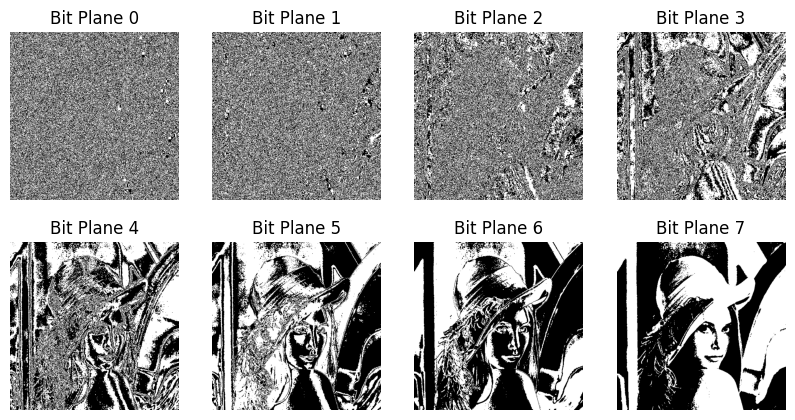

In [21]:
# Function to extract bit planes
def extract_bit_planes(image):
    bit_planes = [(image >> i) & 1 for i in range(8)]
    return bit_planes

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the grayscale image
# lenna_gray = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

# Extract bit planes
bit_planes = extract_bit_planes(lenna_gray)

# Display each bit plane
bit_plane_images = [plane * 255 for plane in bit_planes]  # Convert binary planes to visualizable images (0 and 255)
show_images(bit_plane_images, [f'Bit Plane {i}' for i in range(8)])


Bit plane slicing

 Bit-plane slicing is a technique used in image processing where an image is decomposed into its binary layers, or "bit planes." In an 8-bit grayscale image, each pixel value is represented by 8 bits (ranging from 0 to 255).

 Bit-plane slicing separates these bits, isolating individual planes (from the least significant bit to the most significant bit).

 The higher-order bit planes contain more significant image information, while lower-order planes capture finer details. This method is useful for analyzing and enhancing specific aspects of an image.

 4.To enhance image using histogram equalization and specification

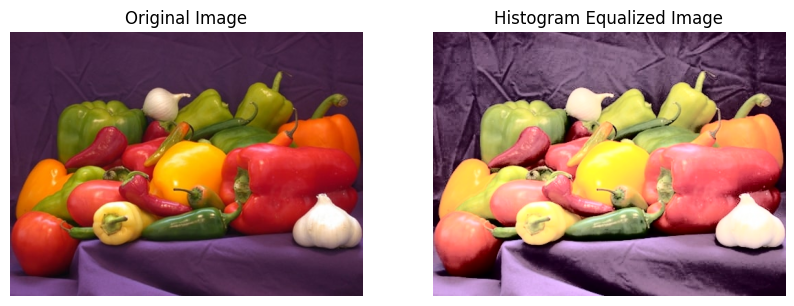

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform histogram equalization on a color image
def histogram_equalization_color(image):
    # Convert the image from BGR to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    # Equalize the histogram of the Y channel
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    # Convert the image back to BGR color space
    equalized_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
    return equalized_image

# Load Peppers image
peppers_color = cv2.imread('peppers.jpg')

# Apply histogram equalization
equalized_image = histogram_equalization_color(peppers_color)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(peppers_color, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()


 Histogram equalization
 in above image we applied histogram equalization

 Histogram equalization is an image processing technique used to enhance contrast by redistributing the intensity values of an image. It works by adjusting the pixel intensities such that they are spread more evenly across the entire range, typically 0 to 255 for an 8-bit image.

 This method increases the global contrast of the image, making details in darker or lighter areas more visible. The result is a more balanced and clearer image, especially useful for images with poor contrast or lighting conditions.

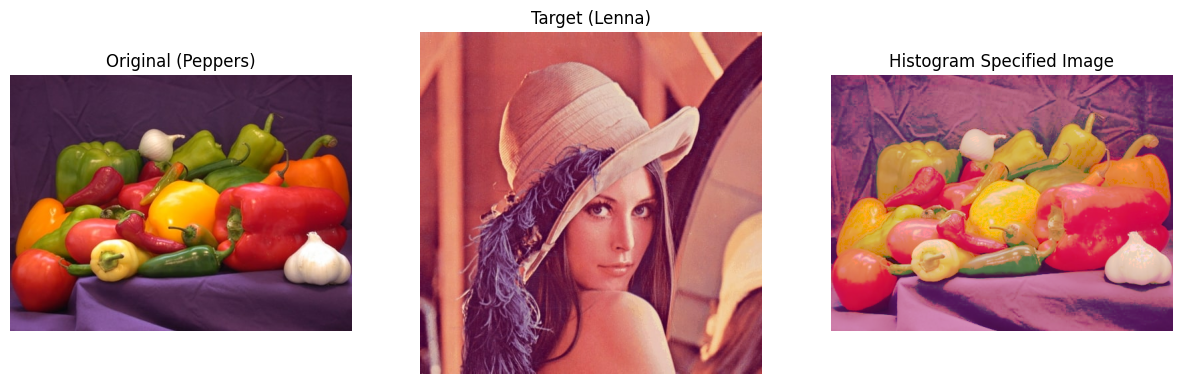

In [23]:
# Function to perform histogram specification (histogram matching) for color images
def histogram_specification_color(source_image, target_image):
    specified_image = np.zeros_like(source_image)
    for i in range(3):  # Apply to each channel
        specified_image[:, :, i] = histogram_specification(source_image[:, :, i], target_image[:, :, i])
    return specified_image

# Function to perform histogram specification (histogram matching) for a single channel
def histogram_specification(source_channel, target_channel):
    # Compute the histograms and cumulative distributions
    source_hist, bins = np.histogram(source_channel.flatten(), 256, [0, 256])
    target_hist, bins = np.histogram(target_channel.flatten(), 256, [0, 256])
    
    # Cumulative distribution functions (CDF)
    cdf_source = np.cumsum(source_hist).astype(np.float64)
    cdf_target = np.cumsum(target_hist).astype(np.float64)
    
    # Normalize the CDFs
    cdf_source_normalized = (cdf_source - cdf_source.min()) * 255 / (cdf_source.max() - cdf_source.min())
    cdf_target_normalized = (cdf_target - cdf_target.min()) * 255 / (cdf_target.max() - cdf_target.min())
    
    # Create a lookup table for mapping pixel values
    lookup_table = np.zeros(256, dtype='uint8')
    target_value = 0
    for i in range(256):
        while target_value < 255 and cdf_source_normalized[i] > cdf_target_normalized[target_value]:
            target_value += 1
        lookup_table[i] = target_value

    # Apply the lookup table to the source channel
    specified_channel = lookup_table[source_channel]
    return specified_channel

# Load images
peppers_color = cv2.imread('peppers.jpg')
lenna_color = cv2.imread('lena_color.jpg')

# Apply histogram specification (match Peppers image to Lenna image histogram)
specified_image = histogram_specification_color(peppers_color, lenna_color)

# Display original, target (Lenna), and specified images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(peppers_color, cv2.COLOR_BGR2RGB))
plt.title('Original (Peppers)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(lenna_color, cv2.COLOR_BGR2RGB))
plt.title('Target (Lenna)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(specified_image, cv2.COLOR_BGR2RGB))
plt.title('Histogram Specified Image')
plt.axis('off')
plt.show()


 Histogram specification

 Histogram specification, also known as histogram matching, is an image processing technique where the histogram of one image (the source) is transformed to match the histogram of another image (the target).

 This process alters the pixel intensity distribution of the source image to make it resemble the target image in terms of contrast, brightness, and overall intensy.it

 Histogram specification is useful when you want to standardize the appearance of multiple images or achieve a specific visual effect based on a reference image.

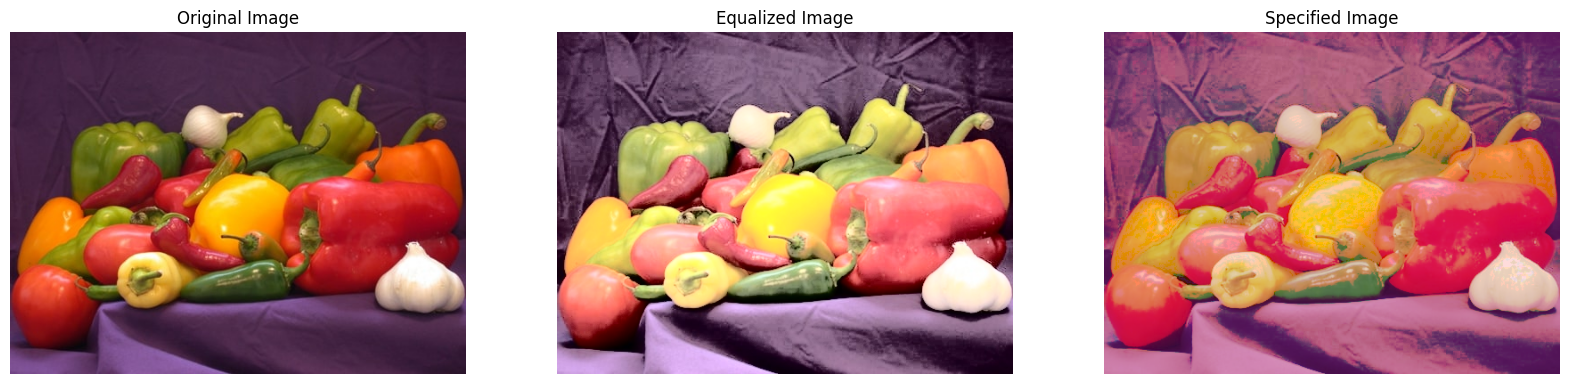

In [24]:
# Display comparison of original, equalized, and specified images
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(specified_image, cv2.COLOR_BGR2RGB))
plt.title('Specified Image')
plt.axis('off')
plt.show()


 comparison of original, equalized, and specified images

 on above all image we compared original image , equalized image and specified image .

 where you can see difference.

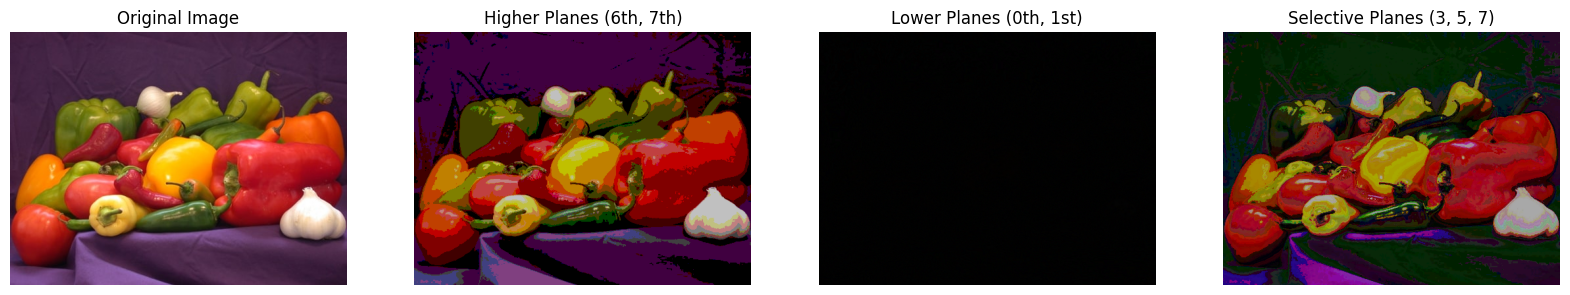

In [25]:
# Function to extract and display bit planes for color images
def extract_bit_planes_color(image):
    bit_planes = []
    for i in range(3):  # For each color channel
        channel_planes = [(image[:, :, i] >> j) & 1 for j in range(8)]
        bit_planes.append(channel_planes)
    return bit_planes

# Function to reconstruct image from specific bit planes for color images
def reconstruct_from_bit_planes_color(bit_planes, planes_to_use):
    reconstructed_image = np.zeros((bit_planes[0][0].shape[0], bit_planes[0][0].shape[1], 3), dtype=np.uint8)
    for i in range(3):  # For each color channel
        channel = np.zeros_like(bit_planes[0][0], dtype=np.uint8)
        for plane in planes_to_use:
            channel += (bit_planes[i][plane] << plane)
        reconstructed_image[:, :, i] = channel
    return reconstructed_image

# Load Peppers image
peppers_color = cv2.imread('peppers.jpg')

# Extract bit planes from the color Peppers image
bit_planes_color = extract_bit_planes_color(peppers_color)

# Using higher bit planes (6th and 7th)
higher_bit_planes_image = reconstruct_from_bit_planes_color(bit_planes_color, [6, 7])

# Using lower bit planes (0th and 1st)
lower_bit_planes_image = reconstruct_from_bit_planes_color(bit_planes_color, [0, 1])

# Using selective bit planes (3rd, 5th, and 7th)
selective_bit_planes_image = reconstruct_from_bit_planes_color(bit_planes_color, [3, 5, 7])

# Display the results
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(peppers_color, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(higher_bit_planes_image, cv2.COLOR_BGR2RGB))
plt.title('Higher Planes (6th, 7th)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(lower_bit_planes_image, cv2.COLOR_BGR2RGB))
plt.title('Lower Planes (0th, 1st)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(selective_bit_planes_image, cv2.COLOR_BGR2RGB))
plt.title('Selective Planes (3, 5, 7)')
plt.axis('off')
plt.show()


 extract and display bit planes for color images

 where you see on image on Higher planes(6th, 7th) , you can see contrasting image.because mie details of images are in 6th and 7th.

 for lower planes(0th,1st), you only see black image , because in that image only noise part will come not other parts.so your image have more noice then that image gonna look a like grainish image.

 also for Selectiove planes (3,5,7) , you can more detail than higher planes , because in that part image have more details.

 5. To sharpen the image.

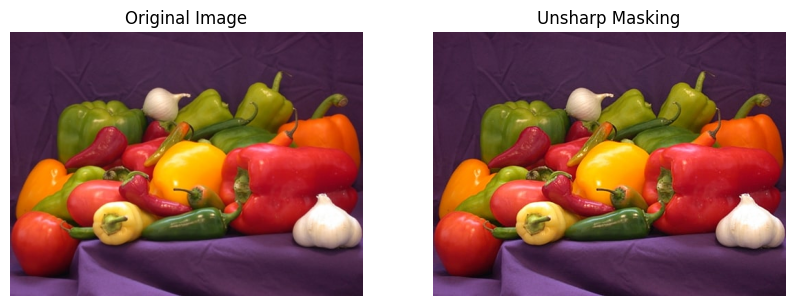

In [27]:
def show_images(images, titles):
    plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()
# Function to apply Unsharp Masking
def unsharp_masking(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 1)
    sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)
    return sharpened_image

# Load Peppers image
peppers_color = cv2.imread('peppers.jpg')

# Apply unsharp masking
unsharp_image = unsharp_masking(peppers_color)

# Display original and unsharp masked images
show_images([peppers_color, unsharp_image], ['Original Image', 'Unsharp Masking'])

 Unsharp Masking

 Unsharp Masking is an image sharpening technique used to enhance the edges and fine details in an image. It works by creating a slightly blurred version of the original image, subtracting this blurred image from the original, and then adding the difference back to the original.

 This emphasizes areas of rapid intensity change (edges), making them stand out more clearly. Unsharp masking is widely used in photography and image editing to improve the overall clarity and sharpness without significantly increasing noise.

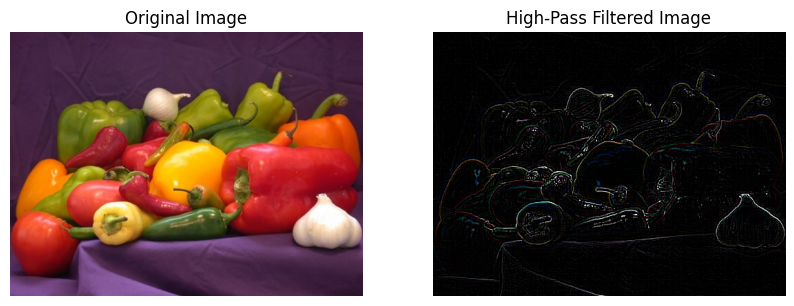

In [32]:
# Function to apply High-Pass Filtering to a color image
def high_pass_filter_color(image):
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    # Split the image into its color channels
    channels = cv2.split(image)
    # Apply high-pass filter to each channel
    filtered_channels = [cv2.filter2D(channel, -1, kernel) for channel in channels]
    # Merge the channels back together
    high_pass_image = cv2.merge(filtered_channels)
    return high_pass_image

# Load Peppers image
peppers_color = cv2.imread('peppers.jpg')

# Apply high-pass filtering
high_pass_image = high_pass_filter_color(peppers_color)

# Display original and high-pass filtered images
show_images([peppers_color, high_pass_image], ['Original Image', 'High-Pass Filtered Image'])

 High-Pass Filtering

 on above image, we use high pass filtering.

 so, in high pass filtering is an image processing technique used to enhance sharp details and edges. It works by allowing high-frequency components (like edges and fine details) to pass through while attenuating lower-frequency components (like smooth areas or background).

 A high-pass filter emphasizes rapid changes in pixel intensity, making it effective for edge detection and image sharpening. This technique is widely used in both photography and computer vision to improve clarity by enhancing structures with sharp transitions in brightness.

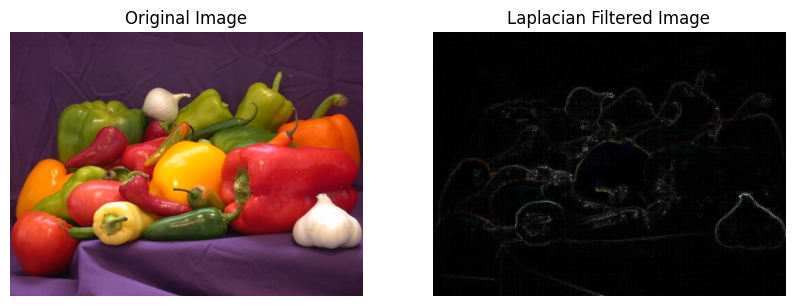

In [29]:
# Function to apply Laplacian Filtering to a color image
def laplacian_filter_color(image):
    # Split the image into its color channels
    channels = cv2.split(image)
    # Apply Laplacian filter to each channel
    filtered_channels = [cv2.Laplacian(channel, cv2.CV_64F) for channel in channels]
    # Convert to uint8 and take absolute value
    filtered_channels = [np.uint8(np.absolute(channel)) for channel in filtered_channels]
    # Merge the channels back together
    laplacian_image = cv2.merge(filtered_channels)
    return laplacian_image

# Load Peppers image
peppers_color = cv2.imread('peppers.jpg')

# Apply Laplacian filtering
laplacian_image = laplacian_filter_color(peppers_color)

# Display original and Laplacian filtered images
show_images([peppers_color, laplacian_image], ['Original Image', 'Laplacian Filtered Image'])

 Laplacian Filtering

 in this Laplacian filtering doing that, enhance edges by detecting areas where the intensity changes rapidly.

 The Laplacian filter calculates the second derivative of the image, highlighting regions of abrupt intensity variation, such as edges. It can be applied to both grayscale and color images to emphasize fine details or sharpen the image.

 This filter is especially useful in edge detection and for enhancing features that are less visible in the original image. However, it can also amplify noise due to its sensitivity to intensity changes.

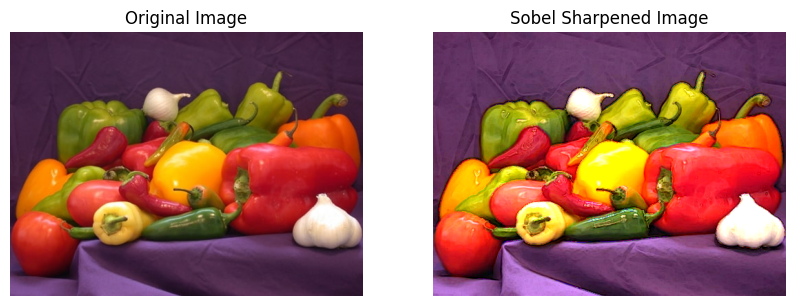

In [30]:
# Function to apply Sobel edge detection and sharpen the image for color images
def sobel_sharpen_color(image):
    # Split the image into its color channels
    channels = cv2.split(image)
    # Apply Sobel edge detection and sharpening to each channel
    sharpened_channels = []
    for channel in channels:
        sobel_x = cv2.Sobel(channel, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(channel, cv2.CV_64F, 0, 1, ksize=3)
        sobel_image = np.sqrt(sobel_x**2 + sobel_y**2)
        sobel_image = np.uint8(sobel_image)
        sharpened_channel = cv2.addWeighted(channel, 1.5, sobel_image, -0.5, 0)
        sharpened_channels.append(sharpened_channel)
    # Merge the channels back together
    sharpened_image = cv2.merge(sharpened_channels)
    return sharpened_image

# Load Peppers image
peppers_color = cv2.imread('peppers.jpg')

# Apply Sobel edge detection and sharpening
sobel_image = sobel_sharpen_color(peppers_color)

# Display original and Sobel sharpened images
show_images([peppers_color, sobel_image], ['Original Image', 'Sobel Sharpened Image'])

 Gradient-Based Sharpening (Sobel)

 Gradient-based sharpening, such as using the Sobel operator, is a common technique in image processing to enhance the edges and details in an image.

 The Sobel operator uses convolution with Sobel kernels to compute the gradient magnitude of the image intensity at each pixel, which highlights areas of rapid intensity change (edges).


 6.Write a Python program to implement median filtering on a grayscale image of your choice

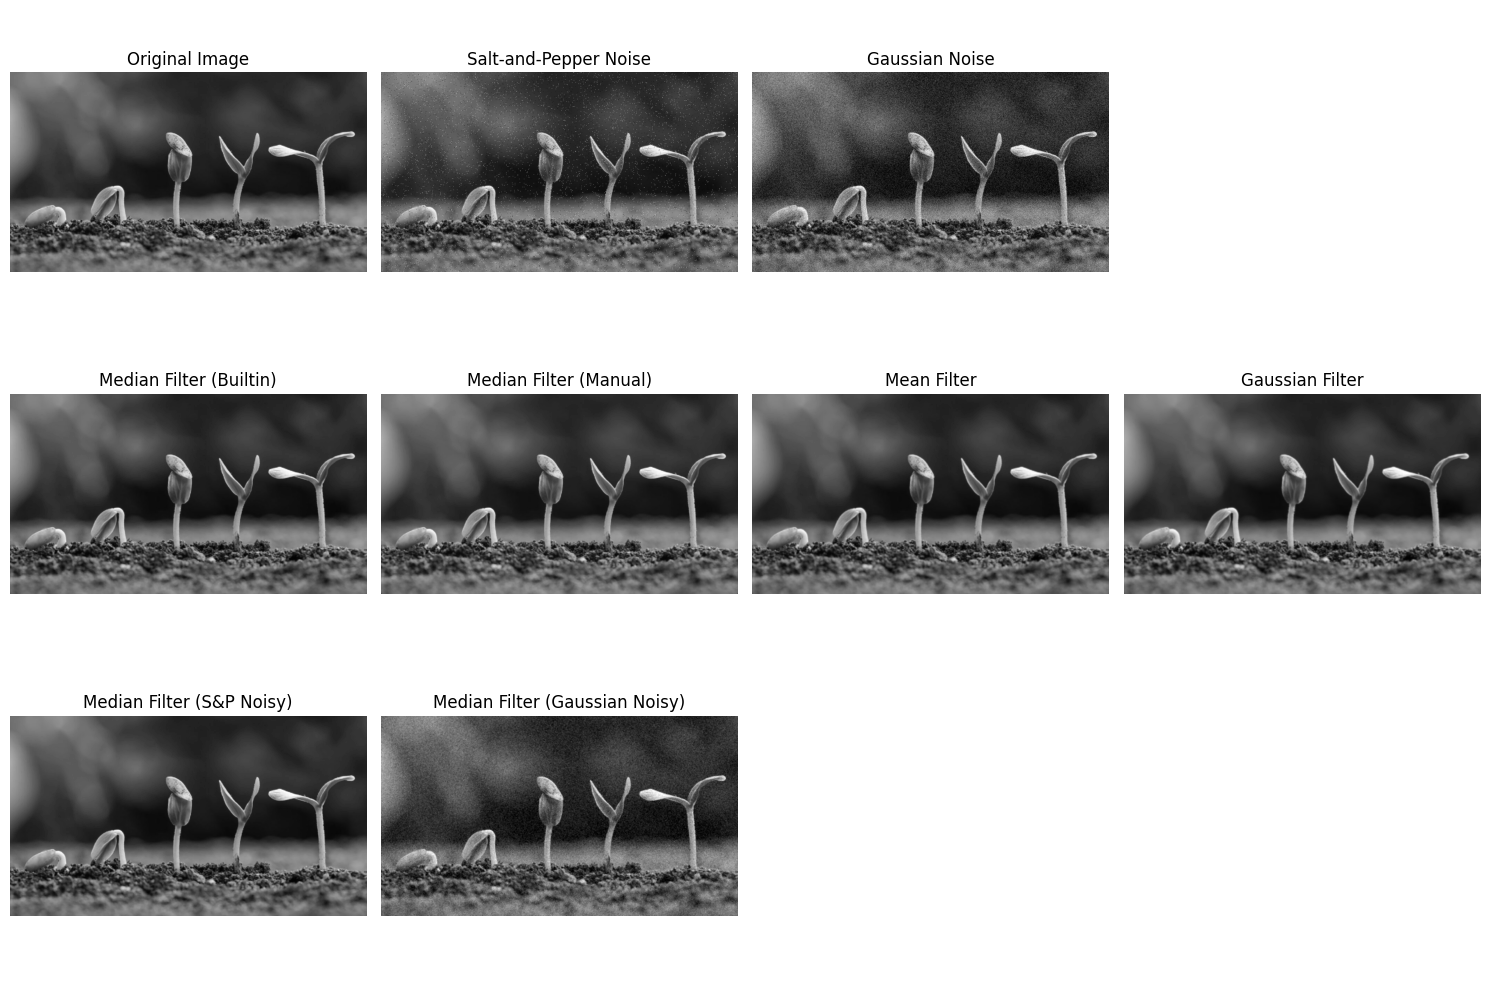

In [31]:
import cv2
import numpy as np
from scipy.ndimage import median_filter, gaussian_filter
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('i1.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size
    num_salt = int(salt_prob * total_pixels)
    num_pepper = int(pepper_prob * total_pixels)
    
    # Add salt noise
    salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[salt_coords[0], salt_coords[1]] = 255
    
    # Add pepper noise
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy

# Add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy = np.clip(image + gaussian, 0, 255)
    return noisy.astype(np.uint8)

# Apply median filter using built-in functions
median_filtered_builtin = median_filter(image, size=3)

# Apply median filter manually
def manual_median_filter(image, size):
    pad_width = size // 2
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+size, j:j+size]
            filtered_image[i, j] = np.median(window)
    
    return filtered_image

median_filtered_manual = manual_median_filter(image, size=3)

# Apply Gaussian filter
gaussian_filtered = gaussian_filter(image, sigma=1)

# Apply mean filter
mean_filtered = cv2.blur(image, (3, 3))

# Add noise
salt_and_pepper_noisy = add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01)
gaussian_noisy = add_gaussian_noise(image)

# Apply filters to noisy images
median_filtered_snp_noisy = median_filter(salt_and_pepper_noisy, size=3)
median_filtered_gaussian_noisy = median_filter(gaussian_noisy, size=3)

# Display results
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(salt_and_pepper_noisy, cmap='gray')
ax[1].set_title('Salt-and-Pepper Noise')
ax[2].imshow(gaussian_noisy, cmap='gray')
ax[2].set_title('Gaussian Noise')

ax[4].imshow(median_filtered_builtin, cmap='gray')
ax[4].set_title('Median Filter (Builtin)')
ax[5].imshow(median_filtered_manual, cmap='gray')
ax[5].set_title('Median Filter (Manual)')
ax[6].imshow(mean_filtered, cmap='gray')
ax[6].set_title('Mean Filter')
ax[7].imshow(gaussian_filtered, cmap='gray')
ax[7].set_title('Gaussian Filter')

ax[8].imshow(median_filtered_snp_noisy, cmap='gray')
ax[8].set_title('Median Filter (S&P Noisy)')
ax[9].imshow(median_filtered_gaussian_noisy, cmap='gray')
ax[9].set_title('Median Filter (Gaussian Noisy)')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


 Observations:

 Noise Addition:

 The code introduces two types of noise: salt-and-pepper noise (binary noise where random pixels are set to 0 or 255) and Gaussian noise (random noise generated from a normal distribution).

 These noises simulate real-world image corruption and are useful for analyzing how different filters handle them.

 Filtering Techniques:

 Median Filter (builtin and manual): This filter effectively removes salt-and-pepper noise by replacing each pixel with the median of its neighborhood. Both the built-in median filter and the manually implemented one perform similarly, though the manual implementation provides deeper insight into how the filtering process works.

 Gaussian Filter: This is a smoothing filter that uses a Gaussian kernel to blur the image, reducing high-frequency noise like Gaussian noise. It's effective for general noise reduction but can blur edges.

 Mean Filter: A simple averaging filter that blurs the image by replacing each pixel with the mean of its neighbors. It reduces noise but also causes significant blurring and loss of details compared to the median filter.

 Filter Performance on Noisy Images:

 Median Filter on Salt-and-Pepper Noise: The median filter is particularly effective at removing salt-and-pepper noise while preserving image edges and details.

 Median Filter on Gaussian Noise: While it helps reduce Gaussian noise, the median filter is less effective compared to the Gaussian filter, which is designed specifically for such noise.

 Gaussian and Mean Filters: Both of these filters smooth the image, but the mean filter causes more blurring and edge distortion than the Gaussian filter.

 Comparison of Built-in vs Manual Median Filter:

 The built-in median filter offers faster execution and optimized performance, while the manual implementation provides better control and understanding of the underlying mechanics but is more computationally expensive.

 Visualization:

 The use of matplotlib to visualize the original, noisy, and filtered images helps in assessing the effectiveness of each filter and the impact of different types of noise.
 
The code effectively demonstrates how different noise types and filters interact, providing insights into the strengths and weaknesses of each filtering method when dealing with various forms of image degradation.